In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
cc_df = pd.read_csv('/aiffel/data/fraud.csv')

In [5]:
pd.set_option('display.max_columns', 50)

In [6]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [7]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [8]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [9]:
cc_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
cc_df = cc_df.drop_duplicates(subset=['cc_num', 'first', 'last', 'trans_date_trans_time'], keep=False)

In [11]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


데이터에 NaN값 즉, 결측치는 없는 것을 확인


중복값은 같은 cc_num, first, last, trans_date_trans_time인 것을 찾아 drop시킴

# 이상치 탐색

In [12]:
cc_df['is_fraud'].sort_values()

0         0
327249    0
327248    0
327247    0
327246    0
         ..
236222    1
376882    1
388160    1
180199    1
169654    1
Name: is_fraud, Length: 491092, dtype: int64

In [13]:
cc_df[cc_df['is_fraud'] == 1]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,fraud_Murray-Smitham,grocery_pos,358.24,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,8a5d80eb4f573480db90899dd8b1c34a,1387592501,47.526202,-113.643313,1
477847,2020-12-21 02:36:03,4716561796955522,fraud_Schmidt and Sons,shopping_net,859.12,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,fe8464ee336fe08b2adacdd0867b1343,1387593363,48.272348,-112.328075,1
479296,2020-12-21 22:38:38,4716561796955522,fraud_Quitzon-Goyette,home,209.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,7cde9b7604a025e251756a4bc9615888,1387665518,49.173669,-112.698767,1
479305,2020-12-21 22:42:11,4716561796955522,fraud_Schulist Ltd,food_dining,123.58,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,daabc7ccf6ccf2c85c1f6186ca11193a,1387665731,48.913048,-113.214921,1


<AxesSubplot:ylabel='is_fraud'>

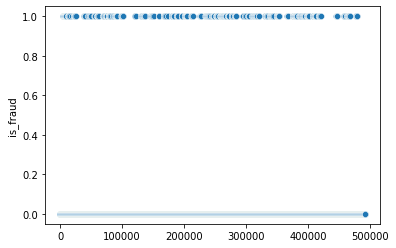

In [14]:
sns.scatterplot(x = cc_df.index, y = cc_df['is_fraud'])

<AxesSubplot:ylabel='amt'>

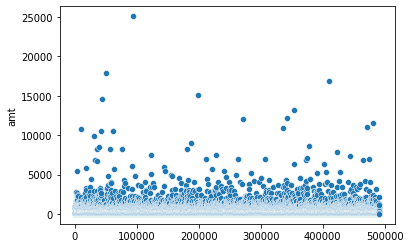

In [15]:
sns.scatterplot(x = cc_df.index, y = cc_df['amt'])

In [16]:
cc_df['amt'].sort_values()

278276        1.00
48593         1.00
296829        1.00
469101        1.00
248413        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amt, Length: 491092, dtype: float64

In [17]:
cc_df['amt'].mean()

69.0517146888974

In [18]:
cc_df = cc_df.drop(cc_df[cc_df['amt'] >= 15000].index)

In [19]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [20]:
cc_df['is_fraud'].sum()

1244

In [21]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.910880e+05,491088.000000,491088.000000,491088.000000,491088.000000,4.910880e+05,4.910880e+05,491088.000000,491088.000000,491088.000000
mean,3.706174e+17,68.899823,50770.944218,37.931052,-90.495699,1.213955e+05,1.358730e+09,37.930097,-90.495490,0.002533
std,1.260255e+18,150.845882,26854.742652,5.341212,12.990595,3.725843e+05,1.819379e+07,5.373026,13.003970,0.050267
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781323,-96.984865,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357255e+09,38.544860,-87.573786,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374624e+09,41.624171,-80.685689,0.000000
max,4.956829e+18,14630.680000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


### 이상치 탐지 결과
- 먼저 이상치가 존재하면 안될 것 같은 칼럼 amt을 확인함
- amt를 확인했을 때 유독 튀는 값이 존재했고 데이터 상으로 카테고리도 travel이였고 is_fraud도 0이고 큰 돈을 썼을 수도 있어서 그냥 둘까도 생각했지만 평균을 확인했을 때 너무 튀는 값이고 데이터의 비율에서 봤을 때 데이터의 양은 충분해서 drop시키는 쪽으로 진행함.
- is_fraud도 함께 확인차로 이것저것 확인함

# 사기거래 여부를 예측하는 데 불필요한 칼럼을 제거

In [22]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491088 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491088 non-null  object 
 1   cc_num                 491088 non-null  int64  
 2   merchant               491088 non-null  object 
 3   category               491088 non-null  object 
 4   amt                    491088 non-null  float64
 5   first                  491088 non-null  object 
 6   last                   491088 non-null  object 
 7   gender                 491088 non-null  object 
 8   street                 491088 non-null  object 
 9   city                   491088 non-null  object 
 10  state                  491088 non-null  object 
 11  zip                    491088 non-null  int64  
 12  lat                    491088 non-null  float64
 13  long                   491088 non-null  float64
 14  city_pop               491088 non-nu

In [23]:
cc_df.drop('street', axis = 1, inplace = True)
cc_df.drop('zip', axis = 1, inplace = True)
cc_df.drop('job', axis = 1, inplace = True)
cc_df.drop('unix_time', axis = 1, inplace = True)

In [24]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491088 entries, 0 to 491133
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491088 non-null  object 
 1   cc_num                 491088 non-null  int64  
 2   merchant               491088 non-null  object 
 3   category               491088 non-null  object 
 4   amt                    491088 non-null  float64
 5   first                  491088 non-null  object 
 6   last                   491088 non-null  object 
 7   gender                 491088 non-null  object 
 8   city                   491088 non-null  object 
 9   state                  491088 non-null  object 
 10  lat                    491088 non-null  float64
 11  long                   491088 non-null  float64
 12  city_pop               491088 non-null  int64  
 13  dob                    491088 non-null  object 
 14  trans_num              491088 non-nu

### 불필요한 칼럼 삭제 결과
-  새로운 피처 생성을 하기 위해서 사용하지 않을 것 같은 불필요한 칼럼을 삭제함.
- 이 과정을 진행하기에는 앞서 내가 어떤 피처를 생성할 것인지를 설계하는 것이 우선이라 생각해 먼저 어떤 피처를 생성할 것인지를 설계하고 그 결과 street과 zip, job 칼럼을 사용하지 않는 결과로 해당 칼럼을 삭제함

# 새로운 피처 생성

In [25]:
fraud_by_state = cc_df.groupby('state')['is_fraud'].sum().reset_index()
# 주state별 사기 거래 수 계산 예시

In [26]:
fraud_by_state.columns = ['state', 'fraud_by_state'] 

In [27]:
cc_df = pd.merge(cc_df, fraud_by_state, on='state', how='left')

In [28]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_by_state
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,49
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,Elizabeth,NJ,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,24
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,Plainfield,NJ,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,24
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,Romulus,MI,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,66
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,Baton Rouge,LA,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,24


### 칼럼 생성 1
- 해당 칼럼은 주 별로 주에서 일어나는 사기건수를 계산

In [29]:
fraud_by_city = cc_df.groupby('city')['is_fraud'].sum().reset_index()

In [30]:
fraud_by_city.columns = ['city', 'fraud_by_city']

In [31]:
cc_df = pd.merge(cc_df, fraud_by_city, on='city', how='left')

In [32]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_by_state,fraud_by_city
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,49,7
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,Elizabeth,NJ,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,24,10
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,Plainfield,NJ,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,24,14
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,Romulus,MI,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,66,10
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,Baton Rouge,LA,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,24,5


### 칼럼 생성 2
- 해당 칼럼은 도시별로 도시에서 일어나는 사기건수를 계산

In [33]:
total_transactions_by_city = cc_df.groupby('city')['city_pop'].max().reset_index()  # 각 도시별 총 인구수
total_transactions_by_city.columns = ['city', 'total_pop']

In [34]:
fraud_rate_by_city = pd.merge(total_transactions_by_city, fraud_by_city, on='city', how='left')
fraud_rate_by_city['fraud_rate_city'] = fraud_rate_by_city['fraud_by_city'] / fraud_rate_by_city['total_pop'] * 100 
# 도시의 인구별 사기건수의 비율 계산

In [35]:
cc_df = pd.merge(cc_df, fraud_rate_by_city, on='city', how='left')

In [36]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_by_state,fraud_by_city_x,total_pop,fraud_by_city_y,fraud_rate_city
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,49,7,149,7,4.697987
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,Elizabeth,NJ,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,24,10,124967,10,0.008002
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,Plainfield,NJ,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,24,14,71485,14,0.019585
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,Romulus,MI,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,66,10,31515,10,0.031731
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,Baton Rouge,LA,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,24,5,378909,5,0.001320


In [37]:
cc_df.drop(['total_pop', 'fraud_by_city_y'], axis=1, inplace=True)  

In [38]:
cc_df.rename(columns = {'fraud_by_city_x': 'fraud_by_city'}, inplace = True)

In [39]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_by_state,fraud_by_city,fraud_rate_city
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,49,7,4.697987
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,Elizabeth,NJ,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,24,10,0.008002
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,Plainfield,NJ,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,24,14,0.019585
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,Romulus,MI,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,66,10,0.031731
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,Baton Rouge,LA,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,24,5,0.001320


### 칼럼 생성 3
- 도시별로 도시의 총 인구수와 도시별 사기건수를 사용하여 사기가 일어나는 비율을 도출

In [40]:
cc_df.describe()

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,fraud_by_state,fraud_by_city,fraud_rate_city
count,4.910880e+05,491088.000000,491088.000000,491088.000000,4.910880e+05,491088.000000,491088.000000,491088.000000,491088.000000,491088.000000,491088.000000
mean,3.706174e+17,68.899823,37.931052,-90.495699,1.213955e+05,37.930097,-90.495490,0.002533,43.748245,10.454676,1.305204
std,1.260255e+18,150.845882,5.341212,12.990595,3.725843e+05,5.373026,13.003970,0.050267,30.027186,4.667628,3.528674
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000,2.000000,0.000000,0.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,33.781323,-96.984865,0.000000,23.000000,7.000000,0.014018
50%,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,38.544860,-87.573786,0.000000,36.000000,11.000000,0.122262
75%,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,41.624171,-80.685689,0.000000,51.000000,14.000000,0.838457
max,4.956829e+18,14630.680000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000,120.000000,25.000000,26.086957


In [41]:
import matplotlib.pyplot as plt

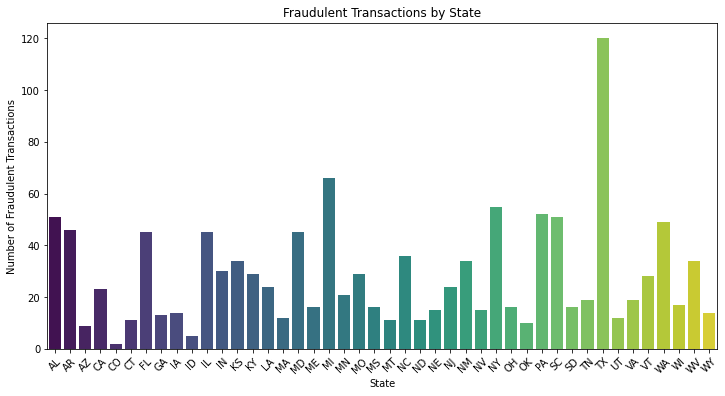

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='fraud_by_state', data=fraud_by_state, palette='viridis')
plt.title('Fraudulent Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

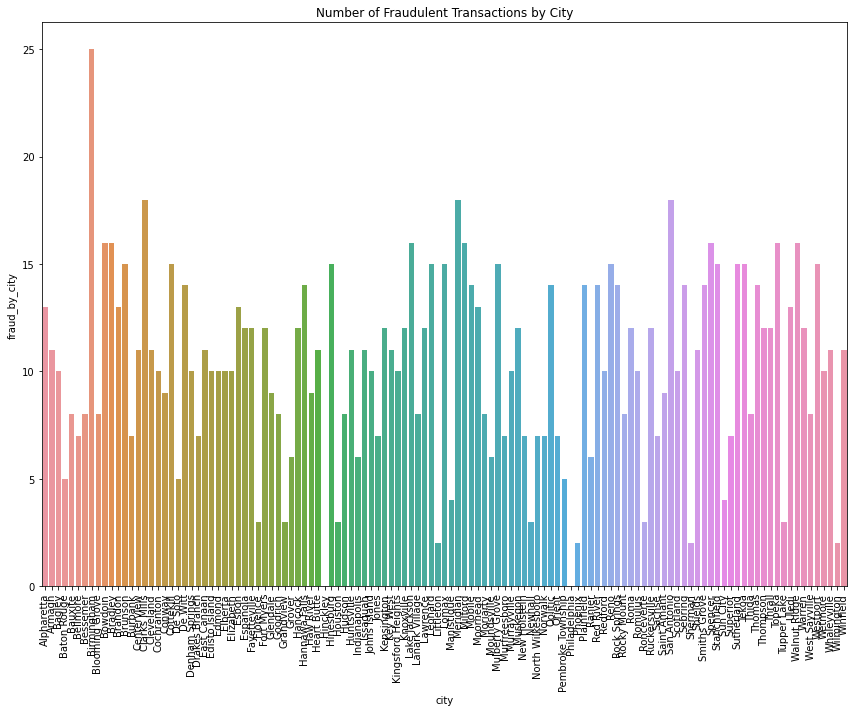

In [43]:
plt.figure(figsize=(12, 10))
sns.barplot(x='city', y='fraud_by_city', data=fraud_by_city)
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('fraud_by_city')
plt.title('Number of Fraudulent Transactions by City')
plt.tight_layout()
plt.show()

In [44]:
cc_df['fraud_by_state'].sort_values()

245423      2
454893      2
128749      2
187746      2
233145      2
         ... 
109500    120
409992    120
34186     120
232840    120
108378    120
Name: fraud_by_state, Length: 491088, dtype: int64

In [45]:
cc_df['fraud_by_city'].sort_values()

215132     0
146029     0
187754     0
236407     0
411101     0
          ..
271632    25
322652    25
407646    25
467201    25
228322    25
Name: fraud_by_city, Length: 491088, dtype: int64

In [46]:
cc_df[cc_df['fraud_by_city'] == 25]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_by_state,fraud_by_city,fraud_rate_city
46,2019-01-01 03:45:11,3596217206093829,"fraud_Christiansen, Goyette and Schamberger",gas_transport,47.65,Sara,Ramirez,F,Birmingham,IA,40.8626,-91.9534,888,1988-03-25,a652884341d367cfa93a12e751ba6d86,41.703284,-91.723311,0,14,25,0.005063
90,2019-01-01 06:56:10,3596217206093829,fraud_Pacocha-O'Reilly,grocery_pos,78.49,Sara,Ramirez,F,Birmingham,IA,40.8626,-91.9534,888,1988-03-25,11b51a73e45701b5bc6c9e0a270427ec,40.753272,-91.930771,0,14,25,0.005063
136,2019-01-01 10:11:43,6011348830550197,fraud_Koelpin and Sons,misc_net,3.06,Samuel,Johnston,M,Birmingham,AL,33.4629,-86.7904,493806,1980-07-12,77a90b057f780cb59a9d1d69e2e976ba,33.030640,-87.384712,0,51,25,0.005063
167,2019-01-01 12:06:10,3596217206093829,"fraud_Lubowitz, Terry and Stracke",personal_care,88.28,Sara,Ramirez,F,Birmingham,IA,40.8626,-91.9534,888,1988-03-25,b619476f8030aeacc0658d45c55c6b6d,40.133124,-92.654578,0,14,25,0.005063
315,2019-01-01 16:13:41,3596217206093829,"fraud_Yost, Schamberger and Windler",kids_pets,20.16,Sara,Ramirez,F,Birmingham,IA,40.8626,-91.9534,888,1988-03-25,1d1d5edb3d954595d160bb76a7e9841d,41.036216,-92.922327,0,14,25,0.005063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490727,2020-12-31 17:33:01,3596217206093829,"fraud_Monahan, Bogisich and Ledner",misc_pos,2.65,Sara,Ramirez,F,Birmingham,IA,40.8626,-91.9534,888,1988-03-25,021e8f8fce77fcca243b85bcdfeadc4e,41.154724,-92.824426,0,14,25,0.005063
490781,2020-12-31 18:26:55,3596217206093829,fraud_Wilkinson PLC,kids_pets,83.60,Sara,Ramirez,F,Birmingham,IA,40.8626,-91.9534,888,1988-03-25,fe4766c9c3d3fc83355f82683da4d6be,40.938379,-92.546106,0,14,25,0.005063
490823,2020-12-31 19:09:53,6011348830550197,fraud_Jacobi Inc,health_fitness,40.46,Samuel,Johnston,M,Birmingham,AL,33.4629,-86.7904,493806,1980-07-12,38326140d0a8e6e6c642f89840945081,33.387115,-85.909771,0,51,25,0.005063
490982,2020-12-31 22:07:06,3596217206093829,fraud_Zboncak LLC,food_dining,22.67,Sara,Ramirez,F,Birmingham,IA,40.8626,-91.9534,888,1988-03-25,6f08e8191857d60b448dbc194d5580c6,40.569749,-91.548244,0,14,25,0.005063


In [47]:
cc_df[cc_df['fraud_by_state'] == 120]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_by_state,fraud_by_city,fraud_rate_city
21,2019-01-01 01:14:11,3518234918950662,fraud_Jaskolski-Dibbert,grocery_net,50.74,Barbara,Lowe,F,Sherman,TX,33.6372,-96.6184,46563,1970-09-11,8ba96beff66354e33f9fe96051a9a4a3,34.266941,-96.709668,0,120,2,0.004295
38,2019-01-01 02:36:30,2264937662466770,fraud_Ledner-Pfannerstill,gas_transport,74.60,Juan,Sherman,M,San Antonio,TX,29.3641,-98.4924,1595797,1995-10-17,3b9b6a9e4bb911cfbaa80a51a651541f,28.654435,-97.738555,0,120,18,0.001128
42,2019-01-01 02:51:32,373905417449658,fraud_Wiegand-Lowe,grocery_net,59.84,Sarah,Bishop,F,Meridian,TX,31.9290,-97.6443,2526,1970-11-12,c03e04a93c4e8242c15f4d93e35c926f,32.362300,-97.137624,0,120,18,0.021402
49,2019-01-01 03:49:49,4452366298769043,fraud_Runolfsson and Sons,grocery_net,30.69,Linda,Davis,F,Blooming Grove,TX,32.0758,-96.7010,1563,1978-03-04,45cc663914e2ec98c824e0ec325019a0,31.706300,-97.507141,0,120,8,0.511836
55,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,Andrew,Mcgee,M,San Antonio,TX,29.5894,-98.5201,1595797,1975-12-28,5ef7adf6786b41be780a08212b32495e,28.740953,-99.391846,0,120,18,0.001128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491054,2020-12-31 23:17:22,4755696071492,"fraud_Baumbach, Feeney and Morar",shopping_net,2.24,Robert,Evans,M,Sachse,TX,32.9643,-96.6012,20328,1985-06-20,5e75e304c3acd6c9c798b1d36440638d,33.880423,-96.883034,0,120,7,0.034435
491057,2020-12-31 23:22:02,503874407318,fraud_Schroeder Group,health_fitness,29.68,Andrew,Mcgee,M,San Antonio,TX,29.5894,-98.5201,1595797,1975-12-28,19a49afc7b0d4c2bd620569ca8894cf8,28.641258,-99.259961,0,120,18,0.001128
491073,2020-12-31 23:37:37,4452366298769043,fraud_Haley Group,misc_pos,1.58,Linda,Davis,F,Blooming Grove,TX,32.0758,-96.7010,1563,1978-03-04,be3ba7799826b14b09c0892acdd8f674,33.000167,-97.502968,0,120,8,0.511836
491078,2020-12-31 23:43:07,30238755902988,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,7.43,Danielle,Yu,F,Thrall,TX,30.5920,-97.2893,1766,1976-01-02,d0f906757e93b9d51c757b8a8b8d27ea,29.831181,-97.742957,0,120,12,0.679502


### 피처 생성 결과
- 주별로 주에 일어나는 사기건수
- 도시별로 도시에 일어나는 사기건수
- 도시 총인구와 도시별 사기건수를 사용해 도시별 인구수대비 사기건수 비율
- 3개의 피처 생성

In [48]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,fraud_by_state,fraud_by_city,fraud_rate_city
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,49,7,4.697987
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,Elizabeth,NJ,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,24,10,0.008002
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,Plainfield,NJ,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,24,14,0.019585
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,Romulus,MI,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,66,10,0.031731
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,Baton Rouge,LA,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,24,5,0.001320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491083,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,34.853497,-78.664158,0,36,2,0.001074
491084,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,Bradley,SC,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,35.008839,-81.475156,0,51,16,1.050558
491085,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,Lake Jackson,TX,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,120,16,0.055673
491086,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,Burbank,WA,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,49,7,0.190011


# 회고
- 처음 데이터를 이것저것 확인하고 파악하는 과정을 가짐
- 그 다음 결측치를 확인하는데 결측치는 존재하지 않아서 결측치 처리 과정은 넘어감,
- 이상치를 처리하는 과정에서 유의미한 칼럼에서의 이상치들을 확인하고 너무 튀는 값에 대해 고민함. 튀는 값도 다 확인하고 그럴 수 있는 값인지 정말 존재하면 안될 이상치인지를 확인함. 시각화해서 보고 describe로 확인한 결과로는 그냥 둬도 될 것 같았지만 깔끔하게 drop하는 것으로 함.
- 처음에 그냥 중복값을 확인했을 때는 없다고 나왔는데 진행하다보니 중복값이 꽤 있는 것 같아서 다시 돌아가서 계좌번호, 이름, 성, 시간이 같은 것을 조회하는 여러개가 존재함 이것도 drop으로 처리함.
- 이번 프로젝트를 진행하면서는 미리 내가 최종적으로 어떤 결과를 낼 것인지를 설계하고 진행함.
- 따라서 어떤 피처를 생성할 것인지 여러가지 생각하고 최종적으로 결정한 피처에 따라 필요한 칼럼 데이터와 불필요한 칼럼을 구별하고 불필요한 칼럼을 삭제 후 피처 생성을 진행함. 하지만 사용을 하지 않은 칼럼들이 몇몇 보이는데 후에 이 데이터를 가지고 이것저것 해보고 싶어서 그냥 둠.
- 결과적으로 총 사기건수는 1244개였고, 그 외 489848개는 정상 거래 건수이다.
- 사실 이번 프로젝트에서는 딱히 가이드라인이 명확히 명시되어있진 않아서 진행하면서도 이게 맞나라는 생각을 많이 했는데 아직 내가 이번 모듈 노드들을 진행하면서 내용들을 확실하게 습득하진 못했다는 증거인듯하다.. 그래도 재밌게 학습하고 프로젝트를 하면서 부족한 부분들을 인지했기 때문에 남는 시간동안 다시 복습하고 주말에 이 프로젝트을 리펙토링 해봐야겠다. 이 데이터를 가지고 할 수 있는게 더 많을 것 같은데 아직 내가 잘 활용하지 못해서 못한 것들이 있는 것 같아서 다시 해보고 github push 예정